# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/draganbogatic/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/draganbogatic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/draganbogatic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/draganbogatic/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [8]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en", page_size=100,sort_by="relevancy")
btc_articles = btc_headlines["articles"]
btc_articles[0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Timothy B. Lee, Ars Technica',
 'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
 'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
 'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
 'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
 'publishedAt': '2020-11-12T14:00:00Z',
 'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"}

In [9]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en", page_size=100,sort_by="relevancy")
eth_articles = eth_headlines["articles"]
eth_articles[0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [10]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_articles:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

In [11]:
# Drop duplicates articles
btc_df.drop_duplicates(keep="first", inplace=True)
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


In [12]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

In [13]:
# Drop duplicates articles
eth_df.drop_duplicates(keep="first", inplace=True)
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948
6,2020-11-19,"PayPal has launched the Generosity Network, a ...",0.8779,0.318,0.0,0.682


In [14]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,86.000000,86.000000,86.000000,86.000000
mean,0.167416,0.061163,0.020174,0.918663
std,0.342956,0.067317,0.043519,0.077978
min,-0.670500,0.000000,0.000000,0.682000
25%,0.000000,0.000000,0.000000,0.858500
50%,0.047300,0.050000,0.000000,0.933000
75%,0.467625,0.121750,0.000000,1.000000
max,0.877900,0.318000,0.215000,1.000000


In [15]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.222390,0.076872,0.022404,0.900734
std,0.371617,0.079784,0.046036,0.088593
min,-0.670500,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.849250
50%,0.220350,0.074500,0.000000,0.912000
75%,0.506425,0.126500,0.000000,1.000000
max,0.883400,0.347000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH has a mean positive score of 0.077646 compared to BTC mean positive score of 0.057571

Q: Which coin had the highest compound score?

A: Both BTC and ETH have the same Max compound score of 0.946800

Q. Which coin had the highest positive score?

A: ETH has the highest positive score of 0.347000 compared t0 BTC 0.297000

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import regex
import re

In [17]:
btc_text_df = btc_df['text'].astype('string')
btc_text_df

0     A former Microsoft software engineer from Ukra...
1     Visa has partnered with cryptocurrency startup...
2     PayPal is bringing its newly-announced support...
3     In November 2017, after an absolutely massive,...
4     Unlike ‘conventional’ cryptocurrencies, a cent...
                            ...                        
93    Visa, PayPal, and Diem, formerly known as Libr...
94    For anyone serious about mining cryptocurrency...
95    PayPal has launched the Generosity Network, a ...
96    November
18, 2020
2 min read
This article w...
97    A woman walks past a Microsoft Store on 5th av...
Name: text, Length: 86, dtype: string

In [18]:
eth_text_df = eth_df['text'].astype('string')
eth_text_df

0     PayPal is bringing its newly-announced support...
1     FILE PHOTO: Representation of the Ethereum vir...
2     LONDON (Reuters) - Digital currencies Ethereum...
4     NEW YORK (Reuters) - Institutional investors p...
6     PayPal has launched the Generosity Network, a ...
                            ...                        
92    Ethereum
Ethereum surged by 9.43% on Friday. ...
93    Singapore is funding blockchain R&amp;D. Germa...
94    CoinDesk just snagged a front-row seat to a se...
95    Ethereum co-founder Vitalik Buterin, dressed l...
96    FIVE BEST SMART CONTRACT PLATFORMS HYPERLEDGER...
Name: text, Length: 94, dtype: string

In [19]:
# Complete the tokenizer function
def tokenizer(text):

    """Tokenizes text."""

    # Create a list of the words
    words = [word_tokenize(sentence) for sentence in text]

    # Remove punctuation using regex
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words_clean = word_tokenize(re_clean)
   
   # Remove the stop words
    sw = set(stopwords.words('english'))
    first_pass = [word for word in words_clean if word not in sw]

    # Define additional stopwords
    sw_addon = {'char', 'chars' 'la', 'im','volod', 'drin', 'wa', 'ha'}
    second_pass = [word.lower() for word in words_clean if word.lower() not in sw.union(sw_addon)] 

    # Lemmatize Words into root words; convert the words to lowercase
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words_clean]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)] 
  
    return tokens

In [20]:
# Tokenizing article in the forst row of the "text" column
tokenizer(btc_text_df[0])

['former',
 'microsoft',
 'software',
 'engineer',
 'ukraine',
 'sentenced',
 'nine',
 'year',
 'prison',
 'stealing',
 'million',
 'store',
 'credit',
 'microsofts',
 'online',
 'store']

In [21]:
# Create for loop to iterate through the rows in the "text" column 
btc_tokens = []
for row in btc_text_df:
    token = tokenizer(row)
    btc_tokens.append(token)

    print(btc_tokens) 

ng', 'long', 'enough', 'people', 'might', 'thinkim', 'engineer', 'working', 'something', 'sr', 'mcelroy'], ['try', 'reaching', 'live', 'customer', 'support', 'person', 'paypal', 'virtually', 'impossible', 'get', 'hold', 'thru', 'automated', 'phone', 'systemimagine', 'glitch', 'cypto', 'transfer', 'ne'], ['pfizer', 'covid', 'vaccine', 'trial', 'show', 'effective', 'dollar', 'index', 'edge', 'oneweek', 'low', 'bitcoin', 'surge', 'last', 'day', 'euro', 'tick', 'investor', 'ignore'], ['mnuchin', 'defends', 'decision', 'end', 'feds', 'pandemic', 'lending', 'dollar', 'poised', 'end', 'week', 'loss', 'euro', 'yen', 'little', 'changed', 'v', 'dollar', 'bitcoin', 'hit', 'fresh', 'threeyear', 'high', 'graphic', 'world', 'fx', 'ra'], ['posted', 'bitcoin', 'soared', 'record', 'high', 'dollar', 'monday', 'rally', 'steamed', 'ahead', 'boosted', 'increased', 'demand', 'institutional', 'retail', 'investor', 'saw', 'virtual', 'c'], ['reuters', 'staffreuters', 'sticky', 'talksfile', 'photo', 'small', 't

In [25]:
# Create a new tokens column for bitcoin
btc_df['btc_token'] = btc_tokens
btc_df.head()

,date,text,compound,positive,negative,neutral,btc_token
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visahas, partnered, cryptocurrency, startup, ..."
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."


In [23]:
eth_tokens = []
for row in eth_text_df:
    token = tokenizer(row)
    eth_tokens.append(token)

    print(eth_tokens) 

ding', 'decentralized', 'finance', 'defi', 'platformannounced', 'tuesday', 'kadena', 'said', 'add'], ['ethereumethereum', 'surged', 'friday', 'following', 'rally', 'thursday', 'ethereum', 'ended', 'day', 'particularly', 'bullish', 'day', 'ethereum', 'rallied', 'early', 'mornin'], ['singapore', 'funding', 'blockchain', 'rampd', 'germanys', 'secondlargest', 'stock', 'exchange', 'crypto', 'app', 'saw', 'billion', 'trading', 'volume', 'year', 'grayscale', 'seeing', 'growing', 'number', 'ethereumfirst'], ['coindesk', 'snagged', 'frontrow', 'seat', 'seminal', 'event', 'crypto', 'industry', 'ticket', 'price', 'ethas', 'medium', 'outlet', 'covering', 'nascent', 'technology', 'believe', 'sometimes', 'chronicle'], ['ethereum', 'cofounder', 'vitalik', 'buterin', 'dressed', 'like', 'medieval', 'harlequin', 'leaning', 'velvet', 'chair', 'stare', 'past', 'viewer', 'distance', 'rocketed', 'sky', 'ether', 'pr']]
[['paypal', 'bringing', 'newlyannounced', 'support', 'cryptocurrency', 'us', 'account', 'f

In [26]:
# Create a new tokens column for ethereum
eth_df['eth_token'] = eth_tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,eth_token
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currency, ethereum,..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, reuters, institutional, investor, ..."
6,2020-11-19,"PayPal has launched the Generosity Network, a ...",0.8779,0.318,0.0,0.682,"[paypal, launched, generosity, network, platfo..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [27]:
from collections import Counter
from nltk import ngrams

In [28]:
# Create one list of tokens from list of tokens in each row
btc_processed = []
for row in btc_df['btc_token']:
    for item in row:
        btc_processed.append(item)
        print(btc_processed)

people', 'might', 'thinkim', 'engineer', 'working', 'something', 'sr', 'mcelroy', 'try', 'reaching', 'live', 'customer', 'support', 'person', 'paypal', 'virtually', 'impossible', 'get', 'hold', 'thru', 'automated', 'phone', 'systemimagine', 'glitch', 'cypto', 'transfer', 'ne', 'pfizer', 'covid', 'vaccine', 'trial', 'show', 'effective', 'dollar', 'index', 'edge', 'oneweek', 'low', 'bitcoin', 'surge', 'last', 'day', 'euro', 'tick', 'investor', 'ignore', 'mnuchin', 'defends', 'decision', 'end', 'feds', 'pandemic', 'lending', 'dollar', 'poised', 'end', 'week', 'loss', 'euro', 'yen', 'little', 'changed', 'v', 'dollar', 'bitcoin', 'hit', 'fresh', 'threeyear', 'high', 'graphic', 'world', 'fx', 'ra', 'posted', 'bitcoin', 'soared', 'record', 'high', 'dollar', 'monday', 'rally', 'steamed', 'ahead', 'boosted', 'increased', 'demand', 'institutional', 'retail', 'investor', 'saw', 'virtual', 'c', 'reuters', 'staffreuters', 'sticky', 'talksfile', 'photo', 'small', 'toy', 'figure', 'seen', 'front', 'b

In [29]:
eth_processed = []
for row in eth_df['eth_token']:
    for item in row:
        eth_processed.append(item)
        print(eth_processed)

centralized', 'finance', 'defi', 'platformannounced', 'tuesday', 'kadena', 'said', 'add', 'ethereumethereum', 'surged', 'friday', 'following', 'rally', 'thursday', 'ethereum', 'ended', 'day', 'particularly', 'bullish', 'day', 'ethereum', 'rallied', 'early', 'mornin', 'singapore', 'funding', 'blockchain', 'rampd', 'germanys', 'secondlargest', 'stock', 'exchange', 'crypto', 'app', 'saw', 'billion', 'trading', 'volume', 'year', 'grayscale', 'seeing', 'growing', 'number', 'ethereumfirst', 'coindesk', 'snagged', 'frontrow', 'seat', 'seminal', 'event', 'crypto', 'industry', 'ticket', 'price', 'ethas', 'medium', 'outlet', 'covering', 'nascent', 'technology', 'believe', 'sometimes', 'chronicle', 'ethereum', 'cofounder', 'vitalik', 'buterin', 'dressed', 'like', 'medieval', 'harlequin', 'leaning', 'velvet', 'chair', 'stare', 'past', 'viewer', 'distance', 'rocketed', 'sky', 'ether', 'pr', 'five', 'best', 'smart', 'contract', 'platforms', 'hyperledger', 'fabric', 'blockchain', 'framework', 'aid', 

In [30]:
# Generate the Bitcoin N-grams where N=2
btc_bigram = Counter(ngrams(btc_processed, n=2))
print(dict(btc_bigram))

): 1, ('payment', 'platform'): 1, ('platform', 'headed'): 1, ('headed', 'famous'): 1, ('famous', 'twitter'): 1, ('twitter', 'ceo'): 1, ('ceo', 'jack'): 1, ('jack', 'dorseyhas'): 1, ('dorseyhas', 'announced'): 1, ('announced', 'october'): 1, ('october', 'reuters'): 1, ('reutersdado', 'ruvicillustrationnew'): 2, ('ruvicillustrationnew', 'york'): 2, ('bitcoin', 'btcbtsp'): 2, ('btcbtsp', 'rose'): 2, ('rose', 'n'): 2, ('n', 'reuters'): 1, ('n', 'london'): 1, ('behind', 'file'): 1, ('seen', 'front'): 3, ('front', 'stock'): 2, ('stock', 'graph'): 3, ('graph', 'illustration'): 2, ('reutersdado', 'ruvicreuters'): 1, ('ruvicreuters', 'bitcoin'): 1, ('bitcoin', 'still'): 1, ('still', 'volatile'): 1, ('volatile', 'irans'): 1, ('irans', 'new'): 1, ('new', 'crypto'): 1, ('crypto', 'law'): 1, ('law', 'requires'): 1, ('requires', 'miners'): 1, ('miners', 'sell'): 1, ('sell', 'bitcoin'): 1, ('bitcoin', 'directly'): 1, ('directly', 'central'): 1, ('bank', 'fund'): 1, ('fund', 'importsiran'): 1, ('impor

In [31]:
# Generate the Ethereum N-grams where N=2
eth_bigram = Counter(ngrams(eth_processed, n=2))
print(dict(eth_bigram))

: 1, ('suite', 'back'): 1, ('back', 'lineup'): 1, ('lineup', 'ethereum'): 1, ('ethereum', 'toolsconsensys'): 1, ('toolsconsensys', 'chief'): 1, ('chief', 'strategy'): 1, ('strategy', 'officer'): 1, ('officer', 'simon'): 1, ('simon', 'morris'): 1, ('morris', 'said'): 1, ('said', 'tuesday'): 1, ('tuesday', 'ethereumfocused'): 1, ('ethereumfocused', 'firm'): 1, ('firm', 'acquired'): 1, ('acquired', 'th'): 1, ('th', 'idex'): 1, ('idex', 'betting'): 1, ('betting', 'three'): 1, ('three', 'chain'): 1, ('chain', 'better'): 1, ('better', 'onethe'): 1, ('onethe', 'noncustodial'): 1, ('noncustodial', 'cryptocurrency'): 1, ('exchange', 'whose'): 1, ('whose', 'operation'): 1, ('operation', 'run'): 1, ('run', 'ethereum'): 1, ('blockchain', 'announced'): 1, ('announced', 'tuesday'): 1, ('tuesday', 'plan'): 1, ('plan', 'expand'): 1, ('expand', 'binance'): 1, ('binance', 'kraken'): 1, ('kraken', 'announced'): 1, ('announced', 'help'): 1, ('help', 'fund'): 1, ('fund', 'opensource'): 1, ('opensource', 'e

In [32]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [33]:
# Get the top 10 words for Bitcoin
btc_top_ten = token_count(btc_processed)
btc_top_ten

[('bitcoin', 71),
 ('reuters', 57),
 ('currency', 31),
 ('virtual', 24),
 ('taken', 23),
 ('cryptocurrency', 20),
 ('photo', 20),
 ('illustration', 19),
 ('reutersdado', 19),
 ('seen', 18)]

In [34]:
# Get the top 10 words for Ethereum
eth_top_ten = token_count(eth_processed)
eth_top_ten

[('ethereum', 50),
 ('bitcoin', 39),
 ('reuters', 18),
 ('blockchain', 18),
 ('cryptocurrency', 15),
 ('price', 13),
 ('asset', 12),
 ('first', 11),
 ('currency', 11),
 ('new', 11)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

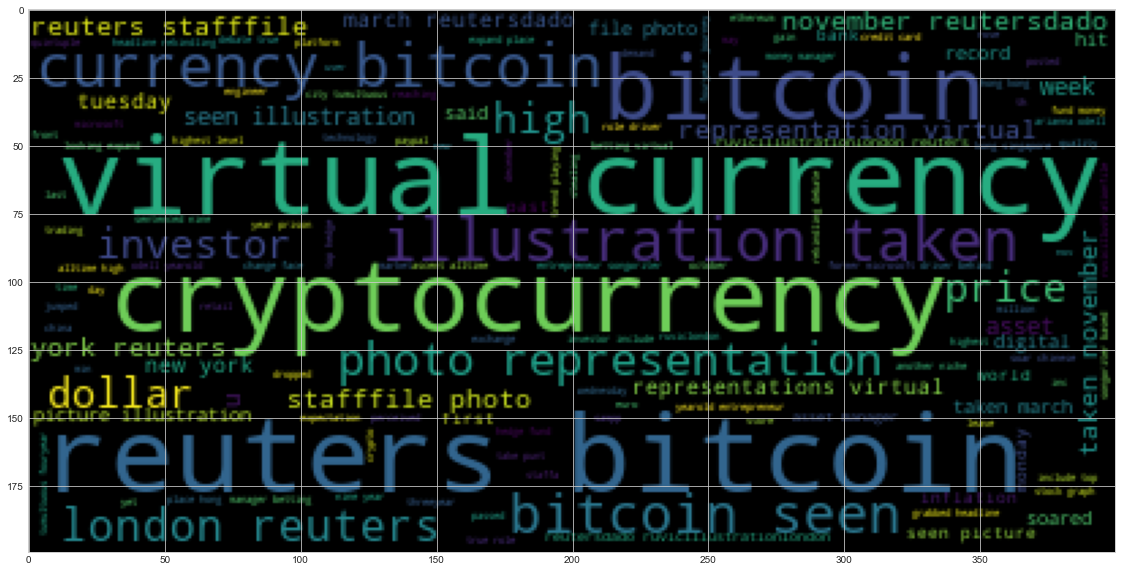

In [40]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_processed))
plt.imshow(wc)

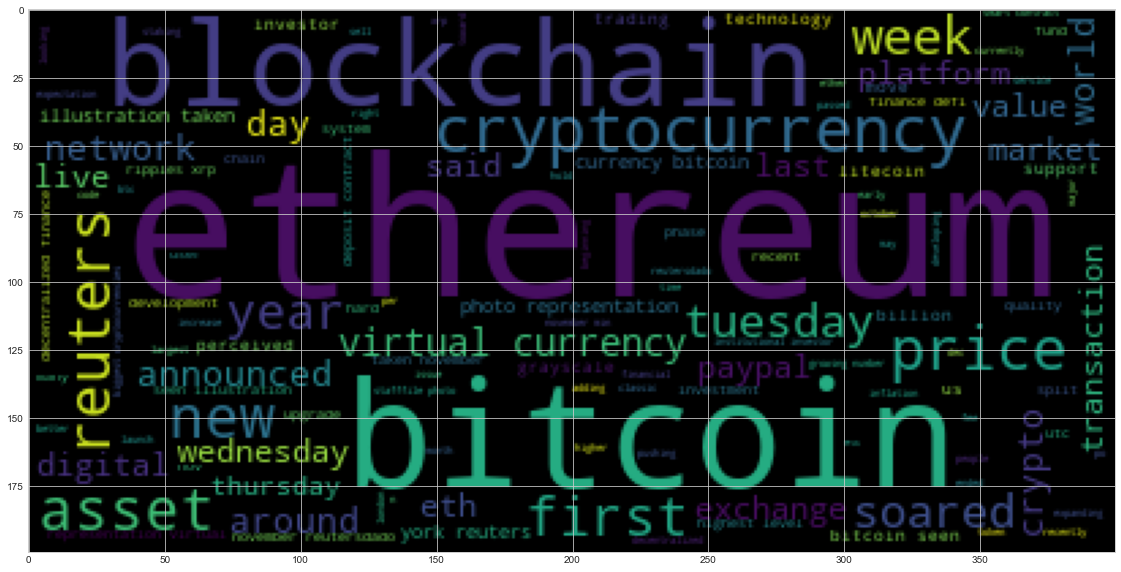

In [36]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(" ".join(eth_processed))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [37]:
import spacy
from spacy import displacy

In [38]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [39]:
# Concatenate all of the bitcoin text together
btc_joined = " ".join(btc_processed)

In [40]:
# Run the NER processor on all of the text
doc_btc = nlp(btc_joined)

# Add a title to the document


In [41]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [42]:
# List all Entities
print([ent.text for ent in doc_btc.ents])

['microsoft', 'ukraine', 'nine year', 'million', 'first', 'bitcoin', 'october', 'november', 'first', 'next day', 'central bank', 'digital yuan', 'peoples bank', 'china', 'past week', 'bitcoin', 'hype lie general mal decentralized exchange', 'crypto', 'november', 'today', 'november', 'monthly', 'april fourthbest month', 'williams', 'arya stark', 'lady catelyn lord', 'eddard acolyte', 'monday', 'microsoft', 'ukraine', 'nine year', 'million', 'tuesday evening', 'december', 'chavez justin', 'bbc newsimage', 'highthe digital cur posted bitcoin grabbed', 'headline week', 'november', 'reutersdado ruvicillustrationtokyo', 'reuters bitcoin', 'reuters', 'us', 'reutersdado', 'london', 'monday', 'february', 'reutersdado ruvicillustrationlondon', 'reuters', 'november', 'reutersdado ruvicillustrationtokyo', 'reuters', 'reutersdado ruviclondonnew york reuters bitcoin jum london reuters inflation hedge', 'bitcoin', 'london reuters inflation hedge', 'bitcoin', 'november', 'min', 'jack', 'october', 'reu

---

## Ethereum NER

In [43]:
# Concatenate all of the bitcoin text together
eth_joined = " ".join(eth_processed)

In [44]:
# Run the NER processor on all of the text
doc_eth = nlp(eth_joined)

# Add a title to the document
# YOUR CODE HERE!

In [45]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [46]:
# List all Entities
print([ent.text for ent in doc_eth.ents])

['october', 'february', 'reutersdado ruvicillustrationlondon', 'london', 'monday', 'new york reuters institutional', 'million', 'week ended', 'second', 'november', 'new york', 'un decentralized exchange', 'early february year', 'one', 'last month', 'october', 'million', 'november', 'min', 'reuters', 'november', 'reutersdado ruvicillustrationnew york', 'november', 'reutersdado ruvicillustrationnew york', 'us', 'reutersdado ruvicillustrationlondon', 'reuters', 'november', 'photolondon reuters bitcoin hala systems', 'hedera', 'syrians', 'systemimagine glitch cypto', 'bitcoin', 'bitcoin', 'tech center', 'sunnyvale', 'california', 'october', 'reutersstephen lamullibitcoin', 'metamaskio wallet wallet', 'browse london reuters', 'tuesday', 'year', 'london reuters bitcoin', 'tuesday', 'year', 'chavez', 'bitcoin', 'tuesday', 'december', 'tom wilson', 'chavezdreyfusslondonnew york', 'bitcoin', 'tuesday', 'december', 'grayscale', 'wednesday', 'asset management', 'billion', 'chavezdreyfussnew york'